**Description:** 

This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM or GRU cells are implemented. 

**Reference:**  
https://github.com/BenjiKCF/Neural-Net-with-Financial-Time-Series-Data

[LSTM_Stock_prediction-20170507 by BenF](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/Applications/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/Users/huangchenchen/Desktop/Columbia/2018 Fall/Deep learning/Project: ['.DS_Store', '2D CNN.docx', 'Autoencoder', 'data', 'DL_FrameworkForFinnacialTimeSeries.pdf', 'L15 Exploding and Vanishing Gradients.pdf', 'LSTM', 'LSTM-Neural-Network-for-Time-Series-Prediction-master', 'LSTM.docx', 'Report Team G_Nov 13th.docx', 'Report Team G_Nov 13th.pdf', 'training-lstm', '~$port Team G_Nov 13th.docx']
/Users/huangchenchen/Desktop/Columbia/2018 Fall/Deep learning/Project/LSTM: ['.DS_Store', '.ipynb_checkpoints', '8d_pred.png', 'LSTM papers and reference repos.docx', 'LSTM_10d.ipynb', 'LSTM_8d.ipynb', 'LSTM_9d.ipynb', 'LSTM_AE_10d.ipynb', 'LSTM_AE_8d.ipynb', 'LSTM_AE_9d.ipynb', 'LSTM_raw.ipynb', 'Raw_pred.png', 'Raw_test_pred.png', 'RNN_sample2.ipynb', 'RNN_samplecode.ipynb', 'RNN_samplecode2.ipynb', 'Update_LSTM.docx']


# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- load index data from csv
- analyze data

In [2]:
# import all features
df = pd.read_csv("../data/update_stresult12-9-12.csv", index_col = 0)
df.head()

,Close,Open,a,b,c,d,e,f,g,h,i
index,,,,,,,,,,,
1,1284.91,1276.69,0.569005,0.564961,0.556215,0.466126,0.467854,0.518728,0.625548,0.255766,0.614300
2,1261.52,1285.82,0.561682,0.551424,0.552582,0.484757,0.474183,0.503305,0.612133,0.273584,0.598870
3,1262.90,1262.96,0.528928,0.488765,0.509790,0.531202,0.507436,0.458893,0.561594,0.366551,0.541050
4,1252.31,1262.90,0.445072,0.420749,0.421726,0.567811,0.570836,0.391935,0.441461,0.531031,0.478413
5,1273.70,1251.84,0.367202,0.322432,0.325329,0.611941,0.633494,0.331366,0.332578,0.709082,0.397330


In [3]:
df.tail()

,Close,Open,a,b,c,d,e,f,g,h,i
index,,,,,,,,,,,
2075,2146.10,2158.54,0.057804,0.186314,0.074010,0.651541,0.907192,0.304747,0.171298,0.974270,0.132987
2076,2159.93,2146.04,0.022407,0.097971,0.046960,0.684067,0.928149,0.264965,0.108994,0.994184,0.053412
2077,2171.37,2161.85,0.033286,0.115607,0.039561,0.678436,0.896964,0.292028,0.132449,0.988993,0.074286
2078,2151.13,2168.90,0.520782,0.436758,0.501659,0.600885,0.409519,0.401433,0.499241,0.329854,0.491685
2079,2168.27,2156.51,0.239699,0.301718,0.331289,0.647523,0.575635,0.346424,0.344831,0.750607,0.221502


In [4]:
df.describe()

,Close,Open,a,b,c,d,e,f,g,h,i
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2.079000e+03,2079.000000
mean,1510.099153,1509.691318,0.476798,0.447634,0.470843,0.598031,0.529943,0.384690,0.465738,5.177779e-01,0.471155
std,414.400699,414.273657,0.427021,0.353991,0.412839,0.100520,0.389599,0.134053,0.354826,4.423570e-01,0.392828
min,676.530000,679.280000,0.000006,0.000337,0.000002,0.285979,0.000341,0.080616,0.000655,1.740000e-08,0.000104
25%,1173.705000,1173.535000,0.020166,0.093081,0.032038,0.521899,0.087556,0.281390,0.111095,7.886009e-03,0.057837
50%,1402.890000,1402.580000,0.400662,0.388680,0.407845,0.606217,0.581080,0.375864,0.429787,5.672414e-01,0.410298
75%,1940.895000,1941.440000,0.973236,0.819231,0.954655,0.680613,0.940363,0.484141,0.844262,9.935504e-01,0.910155
max,2190.150000,2187.810000,0.999996,0.997127,0.999974,0.867466,0.999911,0.738918,0.997863,1.000000e+00,0.999790


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 1 to 2079
Data columns (total 11 columns):
Close    2079 non-null float64
Open     2079 non-null float64
a        2079 non-null float64
b        2079 non-null float64
c        2079 non-null float64
d        2079 non-null float64
e        2079 non-null float64
f        2079 non-null float64
g        2079 non-null float64
h        2079 non-null float64
i        2079 non-null float64
dtypes: float64(11)
memory usage: 194.9 KB


# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- normalize stock data
- create train, validation and test data sets

In [6]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.401937,0.396021,0.569005,0.566442,0.556229,0.309804,0.467714,0.665519,0.626643,0.255766,0.614389
1,0.386484,0.402074,0.561682,0.552861,0.552596,0.341845,0.474046,0.642090,0.613190,0.273584,0.598954
2,0.387396,0.386920,0.528927,0.490001,0.509802,0.421716,0.507314,0.574625,0.562510,0.366551,0.541116
3,0.380399,0.386880,0.445070,0.421766,0.421735,0.484674,0.570741,0.472912,0.442040,0.531031,0.478460
4,0.394531,0.379548,0.367200,0.323132,0.325335,0.560566,0.633425,0.380905,0.332852,0.709082,0.397351


In [7]:
# function for min-max normalization of stock (index)
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(np_scaled)
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

df_stock = df.copy()
cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 10 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_train.shape =  (1655, 9, 11)
y_train.shape =  (1655, 11)
x_valid.shape =  (207, 9, 11)
y_valid.shape =  (207, 11)
x_test.shape =  (207, 9, 11)
y_test.shape =  (207, 11)


# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 
- RNNs with basic, LSTM, GRU cells


In [8]:
## Basic Cell RNN in tensorflow
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 11
n_neurons = 64 
n_outputs = 11
n_layers = 4  
learning_rate = 0.005
batch_size = 50 
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
0.00 epochs: MSE train/valid = 0.288920/0.388273
4.98 epochs: MSE train/valid = 0.091348/0.097136
9.97 epochs: MSE train/valid = 0.055201/0.060729
14.95 epochs: MSE train/valid = 0.053704/0.060345
19.94 epochs: MSE train/valid = 0.053191/0.065662
24.92 epochs: MSE train/valid = 0.049193/0.056494
29.91 epochs: MSE train/valid = 0.047665/0.064022
34.89 epochs: MSE train/valid = 0.044832/0.061007
39.88 epochs: MSE train/valid = 0.040131/0.059020
44.86 epochs: MSE train/valid = 0.039979/0.077099
49.85 epochs: MSE train/valid = 0.027836/0.079970
54.83 epochs: MSE train/valid = 0.022907/0.085614
59.82 epochs: MSE train/valid = 0.012826/0.091937
64.80 epochs: MSE train/valid = 0.009965/0.095603
69.79 epochs: MSE train/valid = 0.009028/0.091446
74.77 epochs: MSE tra

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

In [10]:
y_train.shape

(1655, 19)

R_square:0.79
correct sign prediction for close - open price for train/valid/test: 0.57/0.46/0.46


<Figure size 432x288 with 0 Axes>

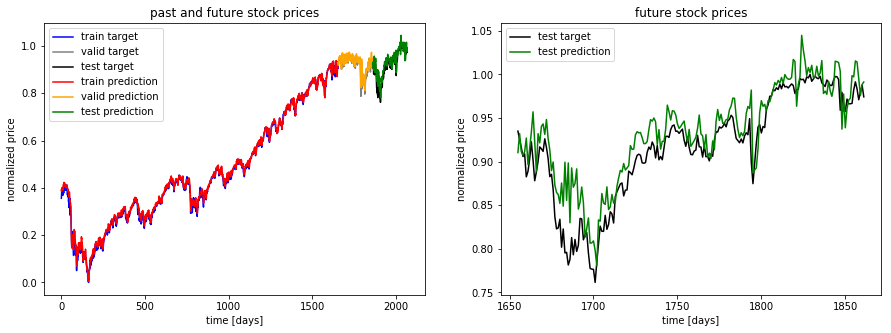

In [15]:
ft = 0 # 0 = close price

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('9d: Past and Future Index Prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('9d: Future Index Prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');
plt.savefig('9d_pred.png',dpi=600,bbox_inches="tight")
corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,0]-y_train[:,1]),
            np.sign(y_train_pred[:,0]-y_train_pred[:,1])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,0]-y_valid[:,1]),
            np.sign(y_valid_pred[:,0]-y_valid_pred[:,1])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,0]-y_test[:,1]),
            np.sign(y_test_pred[:,0]-y_test_pred[:,1])).astype(int)) / y_test.shape[0]

# Calculate R square
SumRes = np.sum((y_test_pred[:,0] - y_test[:,0])**2)
Sumvar = np.var(y_test[:,0])*y_test.shape[0]
R_sq = 1 - SumRes/Sumvar
print('R_square:%.2f'% R_sq)
print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()